In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import seaborn as sns, pandas as pd,numpy as np

In [3]:
data = pd.read_csv('Covid.csv')

data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [4]:
data=data.drop(columns="CLASIFFICATION_FINAL")
data=data.drop(columns='DATE_DIED')



In [5]:
data.dtypes.value_counts()

int64    19
dtype: int64

In [6]:
data.dtypes.tail()

CARDIOVASCULAR    int64
OBESITY           int64
RENAL_CHRONIC     int64
TOBACCO           int64
ICU               int64
dtype: object

In [7]:
data.iloc[:,:-1].min()

USMER             1
MEDICAL_UNIT      1
SEX               1
PATIENT_TYPE      1
INTUBED           1
PNEUMONIA         1
AGE               0
PREGNANT          1
DIABETES          1
COPD              1
ASTHMA            1
INMSUPR           1
HIPERTENSION      1
OTHER_DISEASE     1
CARDIOVASCULAR    1
OBESITY           1
RENAL_CHRONIC     1
TOBACCO           1
dtype: int64

In [8]:
data.iloc[:,:-1].min().value_counts()

1    17
0     1
dtype: int64

In [9]:
data.iloc[:,:-1].max()

USMER               2
MEDICAL_UNIT       13
SEX                 2
PATIENT_TYPE        2
INTUBED            99
PNEUMONIA          99
AGE               121
PREGNANT           98
DIABETES           98
COPD               98
ASTHMA             98
INMSUPR            98
HIPERTENSION       98
OTHER_DISEASE      98
CARDIOVASCULAR     98
OBESITY            98
RENAL_CHRONIC      98
TOBACCO            98
dtype: int64

In [10]:
data.iloc[:,:-1].max().value_counts()

98     11
2       3
99      2
13      1
121     1
dtype: int64

In [11]:
data.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['ICU']= le.fit_transform(data.ICU)
data['ICU']

0          2
1          2
2          1
3          2
4          2
          ..
1048570    2
1048571    1
1048572    2
1048573    2
1048574    2
Name: ICU, Length: 1048575, dtype: int64

In [13]:
feature_cols=data.columns[:-1]
corr_values=data[feature_cols].corr
corr_values



<bound method DataFrame.corr of          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  INTUBED  PNEUMONIA  AGE  \
0            2             1    1             1       97          1   65   
1            2             1    2             1       97          1   72   
2            2             1    2             2        1          2   55   
3            2             1    1             1       97          2   53   
4            2             1    2             1       97          2   68   
...        ...           ...  ...           ...      ...        ...  ...   
1048570      2            13    2             1       97          2   40   
1048571      1            13    2             2        2          2   51   
1048572      2            13    2             1       97          2   55   
1048573      2            13    2             1       97          2   28   
1048574      2            13    2             1       97          2   52   

         PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIP

In [14]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values['abs_correlation']

0      0.127927
1      0.001126
2      0.190570
3      0.175457
4      0.154950
         ...   
148    0.913248
149    0.858102
150    0.842466
151    0.801834
152    0.868761
Name: abs_correlation, Length: 153, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[Text(0.5, 0, 'Absolute correlation'), Text(0, 0.5, 'frequency')]

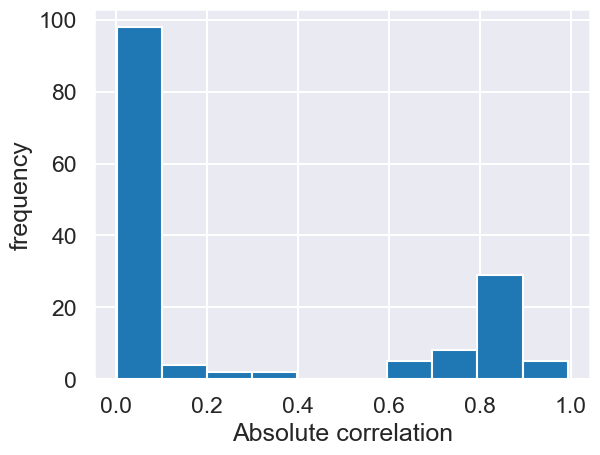

In [16]:
sns.set_context('talk')
sns.set_style('dark')
ax= corr_values.abs_correlation.hist()
ax.set(xlabel='Absolute correlation',ylabel='frequency')

In [17]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

,feature1,feature2,correlation,abs_correlation
37,SEX,PREGNANT,0.992713,0.992713
148,CARDIOVASCULAR,RENAL_CHRONIC,0.913248,0.913248
117,COPD,ASTHMA,0.908929,0.908929
130,ASTHMA,RENAL_CHRONIC,0.895050,0.895050
128,ASTHMA,CARDIOVASCULAR,0.891026,0.891026
123,COPD,RENAL_CHRONIC,0.884032,0.884032
121,COPD,CARDIOVASCULAR,0.880097,0.880097
125,ASTHMA,INMSUPR,0.868917,0.868917
152,RENAL_CHRONIC,TOBACCO,0.868761,0.868761
126,ASTHMA,HIPERTENSION,0.864264,0.864264


In [18]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.ICU))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'ICU']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'ICU']

In [19]:
y_train.value_counts(normalize=True)

2    0.809235
1    0.167546
0    0.016078
3    0.007142
Name: ICU, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

2    0.809237
1    0.167548
0    0.016076
3    0.007140
Name: ICU, dtype: float64

In [ ]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [22]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=1, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [23]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=1, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
### END SOLUTION

In [24]:
### BEGIN SOLUTION
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0], [0,1,2,3]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.head()

lr                                        l1                      \
          0         1          2          3         0         1         2   
0  0.433738 -0.291658   0.567904  -1.996162  0.000000  0.000000  0.000000   
1  0.193640 -0.174227   0.007047   0.017898  0.000000  0.003642 -0.132736   
2  0.084681  0.677595  -0.158063  -3.796132  0.000000  0.000000  0.000000   
3  0.118506  1.549732 -10.129830  13.231834  0.000000  0.000000  0.000000   
4 -2.198185 -0.112928   0.190575   0.114826 -0.190111 -0.101854  0.114280   

                   l2                                
          3         0         1         2         3  
0  0.000000 -0.053779  0.164833 -0.099061 -0.215025  
1 -0.162951  0.086172 -0.042636 -0.133972 -0.104496  
2  0.000000 -0.100157  0.186062 -0.095097 -0.139801  
3  0.000000 -0.207252  0.390645 -0.550554  0.130922  
4 -0.025277 -0.542165 -0.115574  0.114804 -0.012635

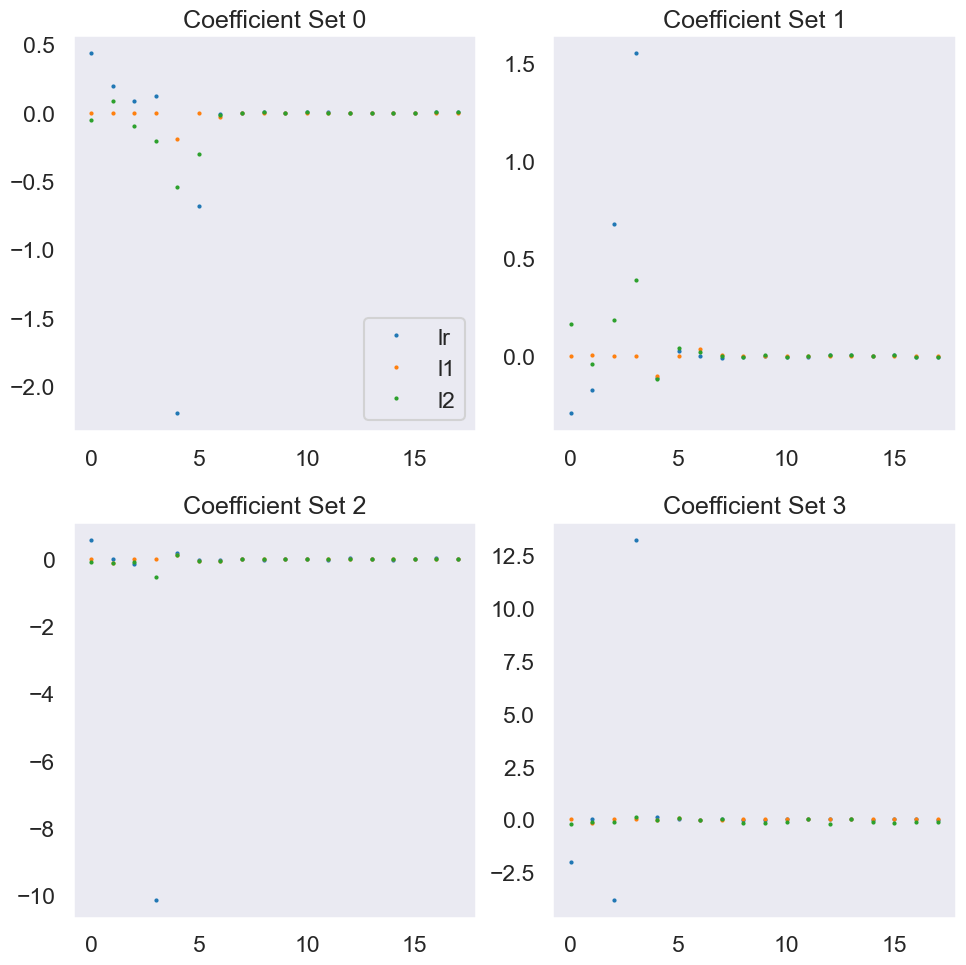

In [25]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc,level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend()
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [26]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,2,2,2
1,2,2,2
2,2,2,2
3,1,1,1
4,1,1,1


In [27]:
y_prob.head()

,lr,l1,l2
0,0.999954,0.998807,0.998573
1,0.999720,0.996460,0.995923
2,0.999668,0.994838,0.995088
3,0.988440,0.906759,0.934948
4,0.870906,0.635496,0.833204


In [28]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3]),
              label_binarize(y_pred[lab], classes=[0,1,2,3]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [29]:
metrics

,lr,l1,l2
precision,0.977174,0.955057,0.962578
recall,0.983778,0.976781,0.977433
fscore,0.976120,0.965563,0.967124
accuracy,0.983778,0.976781,0.977433
auc,0.990257,0.971911,0.973680


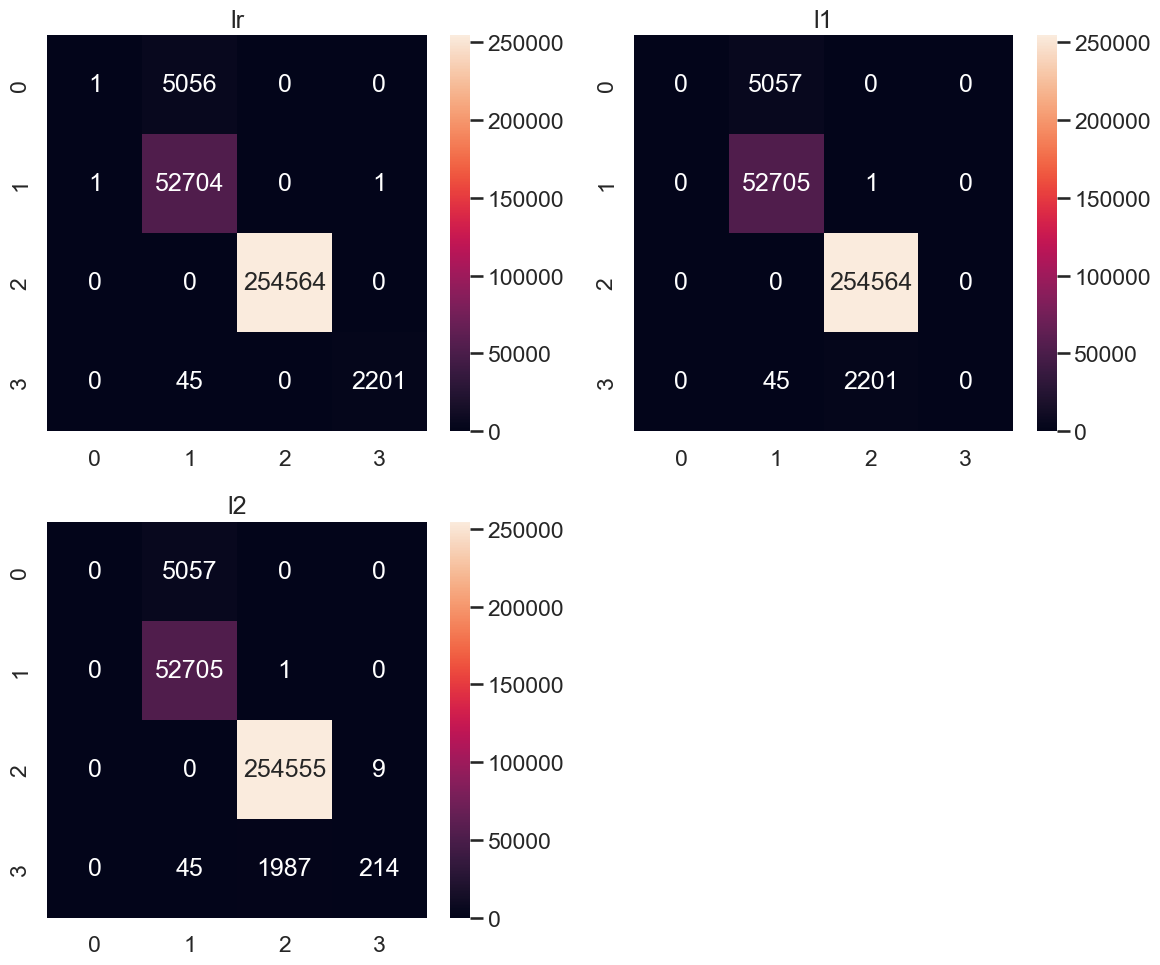

In [30]:
### BEGIN SOLUTION
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()
### END SOLUTION

NameError: name 'df' is not defined